In [7]:
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
articles=['Data Science','Artificial intelligence','European Central Bank','Bank','Financial technology','International Monetary Fund','Basketball','Swimming','Probability']
wiki_lst=[]
title=[]
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)
print("examine content")

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Probability
examine content


In [17]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

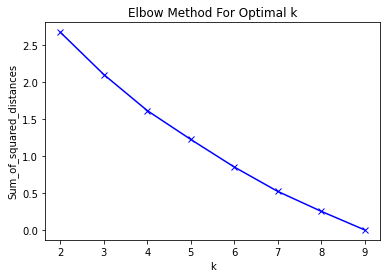

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)



plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
0                 Data Science        0
2        European Central Bank        1
3                         Bank        1
5  International Monetary Fund        1
6                   Basketball        1
4         Financial technology        2
1      Artificial intelligence        3
8                  probability        3
7                     Swimming        4
